### 将免疫细胞Macrophage作为分析对象

思路：

因为免疫细胞Macrophage的比例最高，故将其作为研究对象。

分别选择Macrophage比例大于0.35的normal和Macrophage比例大于0.4的tumor,

添加label:将满足条件的bulk样本标记为Macrophage细胞类型，将不满足条件的bulk样本标记为non_Macrophage类型

有了lable以后，就可以用基因表达矩阵找出Macrophage细胞的差异基因啦~

In [89]:
library(dplyr)
library(textshape)

In [16]:
normal <- read.csv('/home/shiyu/data/BRCA/deconv/normal_ensemble.txt')
tumor <- read.csv('/home/shiyu/data/BRCA/deconv/tumor_ensemble.txt')

normal <- normal[,-1]
tumor <- tumor[,-1]

normal <- column_to_rownames(normal, loc = 1)
tumor <- column_to_rownames(tumor,loc = 1)

head(normal,2)
dim(normal)
head(tumor,2)
dim(tumor)

,B_cell_ensemble,T_cell_CD4_ensemble,T_cell_CD8_ensemble,Neutrophils_ensemble,Macrophage_ensemble
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0.06906615,0.0861180,0.14382494,0.04634232,0.2044922
TCGA.E2.A1IG.11A.22R.A144.07,0.05696585,0.0987988,0.09690256,0.06380285,0.1233271


[1] 113   5

,B_cell_ensemble,T_cell_CD4_ensemble,T_cell_CD8_ensemble,Neutrophils_ensemble,Macrophage_ensemble
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.01A.11R.A144.07,0.03899931,0.1348265,0.1453863,0.06793329,0.1416678
TCGA.AR.A0U0.01A.11R.A109.07,0.01754524,0.1276705,0.1357057,0.09776720,0.1508407


[1] 1106    5

In [29]:
sum_normal <- rowSums(normal)
sum_tumor <- rowSums(tumor)

head(sum_normal)
length(sum_normal)
head(sum_tumor)
length(sum_tumor)

class(sum_tumor)

TCGA.E2.A1L7.11A.33R.A144.07 TCGA.E2.A1IG.11A.22R.A144.07 
                   0.5498436                    0.4397971 
TCGA.BH.A0BS.11A.11R.A12P.07 TCGA.E9.A1NA.11A.33R.A144.07 
                   0.4845541                    0.4668457 
TCGA.BH.A0H9.11A.22R.A466.07 TCGA.BH.A0BQ.11A.33R.A115.07 
                   0.4045418                    0.4844638

[1] 113

TCGA.E2.A1L7.01A.11R.A144.07 TCGA.AR.A0U0.01A.11R.A109.07 
                   0.5288132                    0.5295293 
TCGA.BH.A28O.01A.11R.A22K.07 TCGA.A2.A0D4.01A.11R.A00Z.07 
                   0.4318723                    0.3059238 
TCGA.E9.A1R4.01A.21R.A14D.07 TCGA.AO.A1KQ.01A.11R.A13Q.07 
                   0.5967500                    0.4178148

[1] 1106

[1] "numeric"

In [38]:
Macrophage_proportion_normal <- normal$Macrophage_ensemble/sum_normal
Macrophage_proportion_tumor <- tumor$Macrophage_ensemble/sum_tumor

head(Macrophage_proportion_normal)

class(Macrophage_proportion_normal)
length(Macrophage_proportion_normal)

TCGA.E2.A1L7.11A.33R.A144.07 TCGA.E2.A1IG.11A.22R.A144.07 
                   0.3719097                    0.2804181 
TCGA.BH.A0BS.11A.11R.A12P.07 TCGA.E9.A1NA.11A.33R.A144.07 
                   0.1877614                    0.3686639 
TCGA.BH.A0H9.11A.22R.A466.07 TCGA.BH.A0BQ.11A.33R.A115.07 
                   0.3983044                    0.2616707

[1] "numeric"

[1] 113

In [39]:
Macrophage_proportion_normal <- as.data.frame(Macrophage_proportion_normal)
Macrophage_proportion_tumor <- as.data.frame(Macrophage_proportion_tumor)

class(Macrophage_proportion_normal)
head(Macrophage_proportion_normal,2)

[1] "data.frame"

,Macrophage_proportion_normal
,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0.3719097
TCGA.E2.A1IG.11A.22R.A144.07,0.2804181


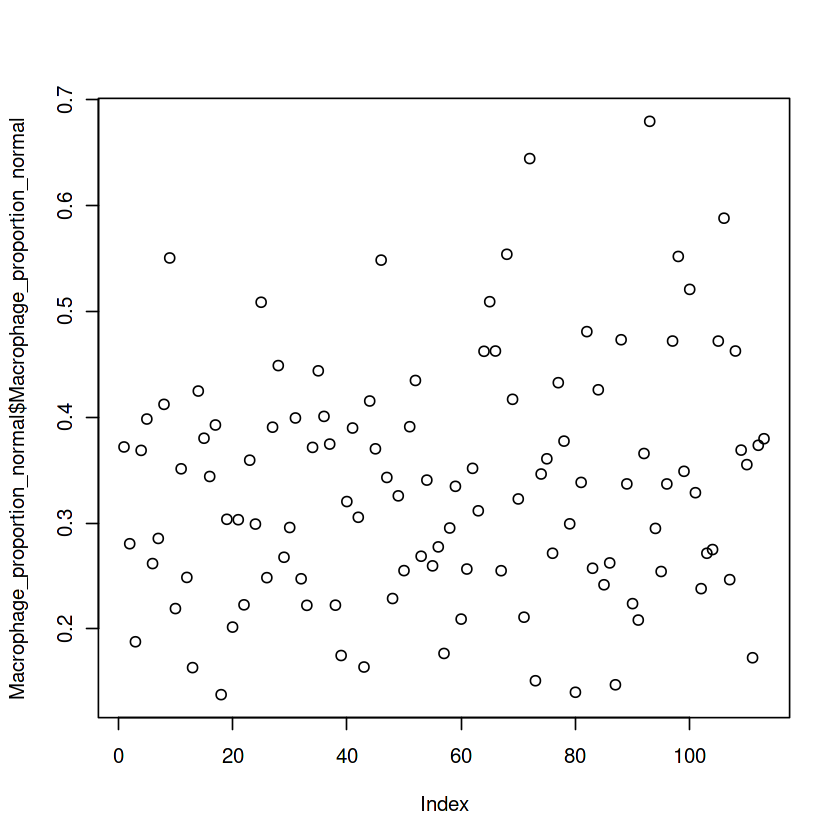

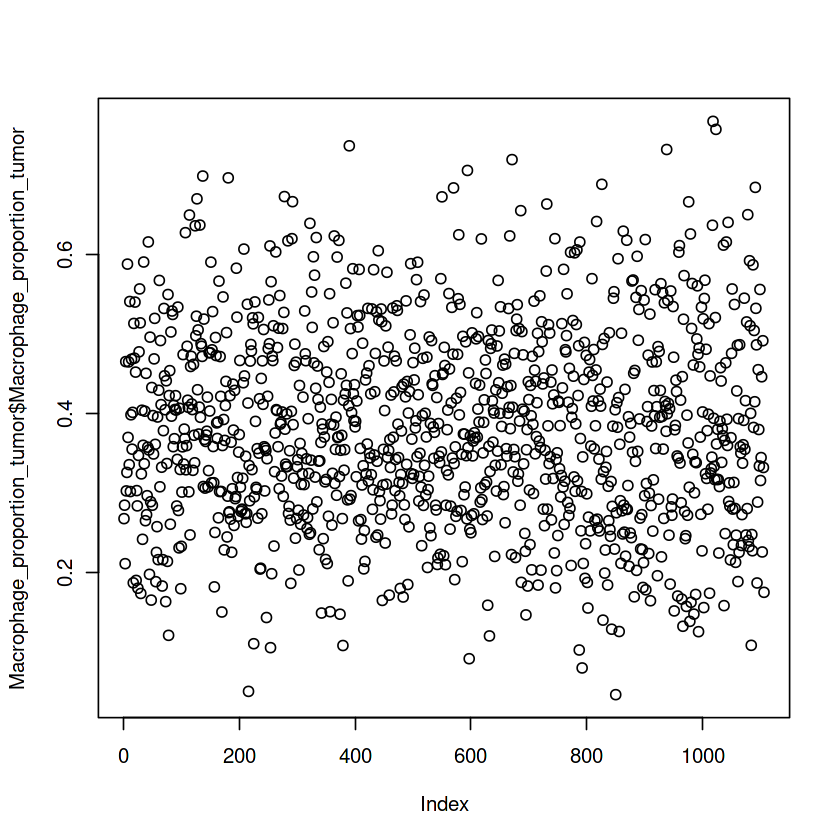

In [44]:
plot(Macrophage_proportion_normal$Macrophage_proportion_normal)

plot(Macrophage_proportion_tumor$Macrophage_proportion_tumor)

In [88]:
con_normal <- subset (Macrophage_proportion_normal, Macrophage_proportion_normal > 0.35) 
con_tumor <- subset (Macrophage_proportion_tumor, Macrophage_proportion_tumor > 0.4) 

head(con_normal,2)
dim(con_normal)
head(con_tumor,2)
dim(con_tumor)

,Macrophage_proportion_normal
,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0.3719097
TCGA.E9.A1NA.11A.33R.A144.07,0.3686639


[1] 49  1

,Macrophage_proportion_tumor
,<dbl>
TCGA.A2.A0D4.01A.11R.A00Z.07,0.4656098
TCGA.AC.A62V.01A.11R.A31O.07,0.5883464


[1] 468   1

In [87]:
library(tibble)

In [90]:
con_normal <- con_normal %>%
  add_column(Add_Column = "Macrophage")
head(con_normal,2)

con_tumor <- con_tumor %>%
  add_column(Add_Column = "Macrophage")
head(con_tumor,2)

,Macrophage_proportion_normal,Add_Column
,<dbl>,<chr>
TCGA.E2.A1L7.11A.33R.A144.07,0.3719097,Macrophage
TCGA.E9.A1NA.11A.33R.A144.07,0.3686639,Macrophage


,Macrophage_proportion_tumor,Add_Column
,<dbl>,<chr>
TCGA.A2.A0D4.01A.11R.A00Z.07,0.4656098,Macrophage
TCGA.AC.A62V.01A.11R.A31O.07,0.5883464,Macrophage


In [91]:
write.csv(con_normal,"/home/shiyu/data/BRCA/DE/Macrophage_normal.txt")  #dataframe转csv
write.csv(con_tumor,"/home/shiyu/data/BRCA/DE/Macrophage_tumor.txt")  #dataframe转csv

### 分割线

In [1]:
con_normal <- read.csv('/home/shiyu/data/BRCA/DE/Macrophage_normal.txt',row.names=1)
con_tumor <- read.csv('/home/shiyu/data/BRCA/DE/Macrophage_tumor.txt',row.names=1)

head(con_normal,2)
dim(con_normal)

,Macrophage_proportion_normal,Add_Column
,<dbl>,<chr>
TCGA.E2.A1L7.11A.33R.A144.07,0.3719097,Macrophage
TCGA.E9.A1NA.11A.33R.A144.07,0.3686639,Macrophage


[1] 49  2

In [2]:
#读入表达矩阵
exp_normal <- read.csv('/home/shiyu/data/BRCA/normal_processed.txt',row.names=1)
exp_tumor <- read.csv('/home/shiyu/data/BRCA/tumor_processed.txt',row.names=1)

head(exp_normal,2)
dim(exp_normal)
head(exp_tumor,2)
dim(exp_tumor)

,TCGA.E2.A1L7.11A.33R.A144.07,TCGA.E2.A1IG.11A.22R.A144.07,TCGA.BH.A0BS.11A.11R.A12P.07,TCGA.E9.A1NA.11A.33R.A144.07,TCGA.BH.A0H9.11A.22R.A466.07,TCGA.BH.A0BQ.11A.33R.A115.07,TCGA.BH.A0E0.11A.13R.A089.07,TCGA.BH.A1FH.11B.42R.A13Q.07,TCGA.E9.A1NG.11A.52R.A14M.07,TCGA.BH.A0DO.11A.22R.A12D.07,⋯,TCGA.AC.A2FM.11B.32R.A19W.07,TCGA.BH.A1FJ.11B.42R.A13Q.07,TCGA.E9.A1ND.11A.43R.A144.07,TCGA.BH.A1FU.11A.23R.A14D.07,TCGA.E9.A1RF.11A.32R.A157.07,TCGA.A7.A0DC.11A.41R.A089.07,TCGA.BH.A18J.11A.31R.A12D.07,TCGA.BH.A18R.11A.42R.A12D.07,TCGA.BH.A0DK.11A.13R.A089.07,TCGA.E2.A158.11A.22R.A12D.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,34456.43,45802.14,40792.82,47720.98,54346.61,60060.62,56380.96,47869.80,58207.63,50600.08,⋯,35023.86,63570.27,54583.62,45925.45,63863.59,51241.93,57424.10,56122.94,50574.07,61826.02
MT-ND4,29705.07,74238.67,30958.63,58551.12,47964.09,55195.35,45929.72,37763.14,61651.61,34446.62,⋯,22139.97,41345.61,43288.65,47376.26,86432.27,66828.33,42646.67,58689.28,54750.21,76165.95


[1] 36809   113

,TCGA.E2.A1L7.01A.11R.A144.07,TCGA.AR.A0U0.01A.11R.A109.07,TCGA.BH.A28O.01A.11R.A22K.07,TCGA.A2.A0D4.01A.11R.A00Z.07,TCGA.E9.A1R4.01A.21R.A14D.07,TCGA.AO.A1KQ.01A.11R.A13Q.07,TCGA.AC.A62V.01A.11R.A31O.07,TCGA.D8.A143.01A.11R.A115.07,TCGA.A2.A0SV.01A.11R.A084.07,TCGA.AN.A0XW.01A.11R.A109.07,⋯,TCGA.A1.A0SD.01A.11R.A115.07,TCGA.A2.A0SU.01A.11R.A084.07,TCGA.E9.A1NI.01A.11R.A14D.07,TCGA.B6.A0RQ.01A.11R.A115.07,TCGA.E9.A1RF.01A.11R.A157.07,TCGA.A2.A0CX.01A.21R.A00Z.07,TCGA.A2.A25F.01A.11R.A169.07,TCGA.AC.A23G.01A.11R.A213.07,TCGA.E2.A15D.01A.11R.A115.07,TCGA.OL.A5D7.01A.11R.A27Q.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,60859.48,13635.21,45131.34,44445.57,58733.92,50169.14,29106.82,14023.49,41179.52,40394.62,⋯,53670.47,36840.02,38192.28,49247.69,58648.42,60492.38,27152.81,43641.78,43380.90,53751.18
MT-CO2,53032.74,15590.23,32871.44,63374.14,44583.73,56750.21,53759.69,17781.93,58022.51,30415.51,⋯,45032.19,39041.64,64153.96,36566.89,63246.87,60335.37,23692.58,28531.81,40341.66,49299.03


[1] 36809  1106

### 筛选出Macrophage细胞对应的列

In [16]:
exp_normal_mac <- exp_normal[,rownames(con_normal)]
head(exp_normal_mac,2)
dim(exp_normal_mac)

exp_tumor_mac <- exp_tumor[,rownames(con_tumor)]
head(exp_tumor_mac,2)
dim(exp_tumor_mac)

,TCGA.E2.A1L7.11A.33R.A144.07,TCGA.E9.A1NA.11A.33R.A144.07,TCGA.BH.A0H9.11A.22R.A466.07,TCGA.BH.A1FH.11B.42R.A13Q.07,TCGA.E9.A1NG.11A.52R.A14M.07,TCGA.E2.A1BC.11A.32R.A12P.07,TCGA.BH.A18S.11A.43R.A12D.07,TCGA.AC.A23H.11A.12R.A157.07,TCGA.BH.A18L.11A.42R.A12D.07,TCGA.BH.A209.11A.42R.A157.07,⋯,TCGA.E9.A1RH.11A.34R.A169.07,TCGA.BH.A1FR.11B.42R.A13Q.07,TCGA.E9.A1N5.11A.41R.A14D.07,TCGA.BH.A1FJ.11B.42R.A13Q.07,TCGA.E9.A1ND.11A.43R.A144.07,TCGA.E9.A1RF.11A.32R.A157.07,TCGA.A7.A0DC.11A.41R.A089.07,TCGA.BH.A18J.11A.31R.A12D.07,TCGA.BH.A0DK.11A.13R.A089.07,TCGA.E2.A158.11A.22R.A12D.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,34456.43,47720.98,54346.61,47869.80,58207.63,74218.14,57901.07,66505.40,53924.00,47855.42,⋯,78296.12,41375.51,42571.01,63570.27,54583.62,63863.59,51241.93,57424.10,50574.07,61826.02
MT-ND4,29705.07,58551.12,47964.09,37763.14,61651.61,72386.51,45432.34,61618.28,57671.11,55992.58,⋯,87880.66,41245.30,43091.85,41345.61,43288.65,86432.27,66828.33,42646.67,54750.21,76165.95


[1] 36809    49

,TCGA.A2.A0D4.01A.11R.A00Z.07,TCGA.AC.A62V.01A.11R.A31O.07,TCGA.A2.A0SV.01A.11R.A084.07,TCGA.D8.A1XV.01A.11R.A14M.07,TCGA.D8.A1XB.01A.11R.A14D.07,TCGA.AR.A2LE.01A.11R.A180.07,TCGA.AN.A0AK.01A.21R.A00Z.07,TCGA.E9.A1NA.01A.11R.A144.07,TCGA.A7.A0DA.01A.31R.A115.07,TCGA.E2.A572.01A.13R.A31O.07,⋯,TCGA.BH.A201.01A.11R.A14M.07,TCGA.E9.A1N8.01A.11R.A144.07,TCGA.C8.A26V.01A.11R.A16F.07,TCGA.B6.A1KF.01A.11R.A13Q.07,TCGA.BH.A1FJ.01A.11R.A13Q.07,TCGA.BH.A0BP.01A.11R.A115.07,TCGA.AC.A5EH.01A.11R.A28M.07,TCGA.E9.A1NI.01A.11R.A14D.07,TCGA.A2.A0CX.01A.21R.A00Z.07,TCGA.AC.A23G.01A.11R.A213.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,44445.57,29106.82,41179.52,41308.18,45721.82,58039.24,55999.81,27869.75,45443.51,35299.44,⋯,52272.42,16041.51,53606.76,77610.06,19687.55,62225.51,24641.26,38192.28,60492.38,43641.78
MT-CO2,63374.14,53759.69,58022.51,44716.89,37280.04,46717.22,45582.81,27432.86,71133.85,50347.36,⋯,48858.54,21372.64,37926.73,74493.77,23099.36,68348.78,25007.15,64153.96,60335.37,28531.81


[1] 36809   468

### 筛选出非Macrophage细胞对应的列

In [17]:
exp_normal_nonmac <- exp_normal[setdiff(names(exp_normal), names(exp_normal_mac))]
head(exp_normal_nonmac,2)
dim(exp_normal_nonmac)

exp_tumor_nonmac <- exp_tumor[setdiff(names(exp_tumor), names(exp_tumor_mac))]
head(exp_tumor_nonmac,2)
dim(exp_tumor_nonmac)

,TCGA.E2.A1IG.11A.22R.A144.07,TCGA.BH.A0BS.11A.11R.A12P.07,TCGA.BH.A0BQ.11A.33R.A115.07,TCGA.BH.A0E0.11A.13R.A089.07,TCGA.BH.A0DO.11A.22R.A12D.07,TCGA.BH.A18Q.11A.34R.A12D.07,TCGA.BH.A0C3.11A.23R.A12P.07,TCGA.E2.A15M.11A.22R.A12D.07,TCGA.BH.A0HA.11A.31R.A12P.07,TCGA.BH.A0BZ.11A.61R.A12P.07,⋯,TCGA.BH.A0AY.11A.23R.A089.07,TCGA.E2.A1LS.11A.32R.A157.07,TCGA.BH.A0DV.11A.22R.A12P.07,TCGA.BH.A18M.11A.33R.A12D.07,TCGA.BH.A0BC.11A.22R.A089.07,TCGA.BH.A0DH.11A.31R.A089.07,TCGA.BH.A203.11A.42R.A169.07,TCGA.AC.A2FM.11B.32R.A19W.07,TCGA.BH.A1FU.11A.23R.A14D.07,TCGA.BH.A18R.11A.42R.A12D.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,45802.14,40792.82,60060.62,56380.96,50600.08,44816.29,49646.08,60909.22,54100.31,58426.27,⋯,44355.46,74290.84,50391.65,49689.12,61460.95,58495.99,57519.60,35023.86,45925.45,56122.94
MT-ND4,74238.67,30958.63,55195.35,45929.72,34446.62,35501.27,45123.71,59921.02,45843.39,65773.98,⋯,38460.70,89065.33,40397.98,43055.50,44451.52,52498.67,69558.18,22139.97,47376.26,58689.28


[1] 36809    64

,TCGA.E2.A1L7.01A.11R.A144.07,TCGA.AR.A0U0.01A.11R.A109.07,TCGA.BH.A28O.01A.11R.A22K.07,TCGA.E9.A1R4.01A.21R.A14D.07,TCGA.AO.A1KQ.01A.11R.A13Q.07,TCGA.D8.A143.01A.11R.A115.07,TCGA.AN.A0XW.01A.11R.A109.07,TCGA.A2.A4RW.01A.21R.A266.07,TCGA.A7.A0CD.01A.11R.A00Z.07,TCGA.C8.A134.01A.11R.A115.07,⋯,TCGA.D8.A145.01A.11R.A115.07,TCGA.AN.A03Y.01A.21R.A00Z.07,TCGA.EW.A1P6.01A.11R.A144.07,TCGA.A1.A0SD.01A.11R.A115.07,TCGA.A2.A0SU.01A.11R.A084.07,TCGA.B6.A0RQ.01A.11R.A115.07,TCGA.E9.A1RF.01A.11R.A157.07,TCGA.A2.A25F.01A.11R.A169.07,TCGA.E2.A15D.01A.11R.A115.07,TCGA.OL.A5D7.01A.11R.A27Q.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,60859.48,13635.21,45131.34,58733.92,50169.14,14023.49,40394.62,57167.71,37978.17,33252.57,⋯,32840.85,55303.95,63520.47,53670.47,36840.02,49247.69,58648.42,27152.81,43380.90,53751.18
MT-CO2,53032.74,15590.23,32871.44,44583.73,56750.21,17781.93,30415.51,36467.98,31656.62,48101.64,⋯,26219.90,67396.65,47291.45,45032.19,39041.64,36566.89,63246.87,23692.58,40341.66,49299.03


[1] 36809   638

In [18]:
# 添加group标签
exp_normal_mac[nrow(exp_normal_mac)+1,] <- rep('Macrophage',ncol(exp_normal_mac))
exp_tumor_mac[nrow(exp_tumor_mac)+1,] <- rep('Macrophage',ncol(exp_tumor_mac))


exp_normal_nonmac[nrow(exp_normal_nonmac)+1,] <- rep('non_Macrophage',ncol(exp_normal_nonmac))
exp_tumor_nonmac[nrow(exp_tumor_nonmac)+1,] <- rep('non_Macrophage',ncol(exp_tumor_nonmac))

In [19]:
exp_normal_mac[36809:36810,]
dim(exp_normal_mac)

exp_tumor_mac[36809:36810,]
dim(exp_tumor_mac)

exp_normal_nonmac[36809:36810,]
dim(exp_normal_nonmac)

exp_tumor_nonmac[36809:36810,]
dim(exp_tumor_nonmac)

,TCGA.E2.A1L7.11A.33R.A144.07,TCGA.E9.A1NA.11A.33R.A144.07,TCGA.BH.A0H9.11A.22R.A466.07,TCGA.BH.A1FH.11B.42R.A13Q.07,TCGA.E9.A1NG.11A.52R.A14M.07,TCGA.E2.A1BC.11A.32R.A12P.07,TCGA.BH.A18S.11A.43R.A12D.07,TCGA.AC.A23H.11A.12R.A157.07,TCGA.BH.A18L.11A.42R.A12D.07,TCGA.BH.A209.11A.42R.A157.07,⋯,TCGA.E9.A1RH.11A.34R.A169.07,TCGA.BH.A1FR.11B.42R.A13Q.07,TCGA.E9.A1N5.11A.41R.A14D.07,TCGA.BH.A1FJ.11B.42R.A13Q.07,TCGA.E9.A1ND.11A.43R.A144.07,TCGA.E9.A1RF.11A.32R.A157.07,TCGA.A7.A0DC.11A.41R.A089.07,TCGA.BH.A18J.11A.31R.A12D.07,TCGA.BH.A0DK.11A.13R.A089.07,TCGA.E2.A158.11A.22R.A12D.07
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LINC02220,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
36810,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,⋯,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage


[1] 36810    49

,TCGA.A2.A0D4.01A.11R.A00Z.07,TCGA.AC.A62V.01A.11R.A31O.07,TCGA.A2.A0SV.01A.11R.A084.07,TCGA.D8.A1XV.01A.11R.A14M.07,TCGA.D8.A1XB.01A.11R.A14D.07,TCGA.AR.A2LE.01A.11R.A180.07,TCGA.AN.A0AK.01A.21R.A00Z.07,TCGA.E9.A1NA.01A.11R.A144.07,TCGA.A7.A0DA.01A.31R.A115.07,TCGA.E2.A572.01A.13R.A31O.07,⋯,TCGA.BH.A201.01A.11R.A14M.07,TCGA.E9.A1N8.01A.11R.A144.07,TCGA.C8.A26V.01A.11R.A16F.07,TCGA.B6.A1KF.01A.11R.A13Q.07,TCGA.BH.A1FJ.01A.11R.A13Q.07,TCGA.BH.A0BP.01A.11R.A115.07,TCGA.AC.A5EH.01A.11R.A28M.07,TCGA.E9.A1NI.01A.11R.A14D.07,TCGA.A2.A0CX.01A.21R.A00Z.07,TCGA.AC.A23G.01A.11R.A213.07
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
DAZ2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
36810,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,⋯,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage,Macrophage


[1] 36810   468

,TCGA.E2.A1IG.11A.22R.A144.07,TCGA.BH.A0BS.11A.11R.A12P.07,TCGA.BH.A0BQ.11A.33R.A115.07,TCGA.BH.A0E0.11A.13R.A089.07,TCGA.BH.A0DO.11A.22R.A12D.07,TCGA.BH.A18Q.11A.34R.A12D.07,TCGA.BH.A0C3.11A.23R.A12P.07,TCGA.E2.A15M.11A.22R.A12D.07,TCGA.BH.A0HA.11A.31R.A12P.07,TCGA.BH.A0BZ.11A.61R.A12P.07,⋯,TCGA.BH.A0AY.11A.23R.A089.07,TCGA.E2.A1LS.11A.32R.A157.07,TCGA.BH.A0DV.11A.22R.A12P.07,TCGA.BH.A18M.11A.33R.A12D.07,TCGA.BH.A0BC.11A.22R.A089.07,TCGA.BH.A0DH.11A.31R.A089.07,TCGA.BH.A203.11A.42R.A169.07,TCGA.AC.A2FM.11B.32R.A19W.07,TCGA.BH.A1FU.11A.23R.A14D.07,TCGA.BH.A18R.11A.42R.A12D.07
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LINC02220,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
36810,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,⋯,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage


[1] 36810    64

,TCGA.E2.A1L7.01A.11R.A144.07,TCGA.AR.A0U0.01A.11R.A109.07,TCGA.BH.A28O.01A.11R.A22K.07,TCGA.E9.A1R4.01A.21R.A14D.07,TCGA.AO.A1KQ.01A.11R.A13Q.07,TCGA.D8.A143.01A.11R.A115.07,TCGA.AN.A0XW.01A.11R.A109.07,TCGA.A2.A4RW.01A.21R.A266.07,TCGA.A7.A0CD.01A.11R.A00Z.07,TCGA.C8.A134.01A.11R.A115.07,⋯,TCGA.D8.A145.01A.11R.A115.07,TCGA.AN.A03Y.01A.21R.A00Z.07,TCGA.EW.A1P6.01A.11R.A144.07,TCGA.A1.A0SD.01A.11R.A115.07,TCGA.A2.A0SU.01A.11R.A084.07,TCGA.B6.A0RQ.01A.11R.A115.07,TCGA.E9.A1RF.01A.11R.A157.07,TCGA.A2.A25F.01A.11R.A169.07,TCGA.E2.A15D.01A.11R.A115.07,TCGA.OL.A5D7.01A.11R.A27Q.07
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
DAZ2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
36810,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,⋯,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage,non_Macrophage


[1] 36810   638

In [22]:
#数据合并
normal_lab <- cbind(exp_normal_mac,exp_normal_nonmac)
tumor_lab <- cbind(exp_tumor_mac,exp_tumor_nonmac)

head(normal_lab,2)
dim(normal_lab)
head(tumor_lab,2)
dim(tumor_lab)

,TCGA.E2.A1L7.11A.33R.A144.07,TCGA.E9.A1NA.11A.33R.A144.07,TCGA.BH.A0H9.11A.22R.A466.07,TCGA.BH.A1FH.11B.42R.A13Q.07,TCGA.E9.A1NG.11A.52R.A14M.07,TCGA.E2.A1BC.11A.32R.A12P.07,TCGA.BH.A18S.11A.43R.A12D.07,TCGA.AC.A23H.11A.12R.A157.07,TCGA.BH.A18L.11A.42R.A12D.07,TCGA.BH.A209.11A.42R.A157.07,⋯,TCGA.BH.A0AY.11A.23R.A089.07,TCGA.E2.A1LS.11A.32R.A157.07,TCGA.BH.A0DV.11A.22R.A12P.07,TCGA.BH.A18M.11A.33R.A12D.07,TCGA.BH.A0BC.11A.22R.A089.07,TCGA.BH.A0DH.11A.31R.A089.07,TCGA.BH.A203.11A.42R.A169.07,TCGA.AC.A2FM.11B.32R.A19W.07,TCGA.BH.A1FU.11A.23R.A14D.07,TCGA.BH.A18R.11A.42R.A12D.07
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MT-CO3,34456.4262475354,47720.9772714128,54346.6058135086,47869.8007862719,58207.6309097957,74218.1401181171,57901.0743848635,66505.3957051483,53923.9999469596,47855.4187678848,⋯,44355.4615703369,74290.8447291017,50391.648485035,49689.1151085735,61460.950071108,58495.9932956088,57519.5976982702,35023.8573083149,45925.4471750091,56122.9404326923
MT-ND4,29705.0723007272,58551.1168339312,47964.0879152856,37763.141960284,61651.6052699473,72386.5083831726,45432.3381229264,61618.2784375218,57671.1073715438,55992.5765823209,⋯,38460.6965615111,89065.3257827783,40397.9821336001,43055.4957534173,44451.5212513043,52498.6654846155,69558.1825101459,22139.9738918719,47376.2626684524,58689.275944393


[1] 36810   113

,TCGA.A2.A0D4.01A.11R.A00Z.07,TCGA.AC.A62V.01A.11R.A31O.07,TCGA.A2.A0SV.01A.11R.A084.07,TCGA.D8.A1XV.01A.11R.A14M.07,TCGA.D8.A1XB.01A.11R.A14D.07,TCGA.AR.A2LE.01A.11R.A180.07,TCGA.AN.A0AK.01A.21R.A00Z.07,TCGA.E9.A1NA.01A.11R.A144.07,TCGA.A7.A0DA.01A.31R.A115.07,TCGA.E2.A572.01A.13R.A31O.07,⋯,TCGA.D8.A145.01A.11R.A115.07,TCGA.AN.A03Y.01A.21R.A00Z.07,TCGA.EW.A1P6.01A.11R.A144.07,TCGA.A1.A0SD.01A.11R.A115.07,TCGA.A2.A0SU.01A.11R.A084.07,TCGA.B6.A0RQ.01A.11R.A115.07,TCGA.E9.A1RF.01A.11R.A157.07,TCGA.A2.A25F.01A.11R.A169.07,TCGA.E2.A15D.01A.11R.A115.07,TCGA.OL.A5D7.01A.11R.A27Q.07
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MT-CO3,44445.5698990895,29106.8227303142,41179.5247448929,41308.1770667869,45721.8213358186,58039.2409076433,55999.8100947126,27869.7469952358,45443.5101584016,35299.441792364,⋯,32840.8503326866,55303.9466926195,63520.4661320671,53670.4728989383,36840.0194181197,49247.6910652339,58648.4183447714,27152.8144408116,43380.898765984,53751.1766781271
MT-CO2,63374.1422966266,53759.692151884,58022.5065635709,44716.8874977732,37280.0429735999,46717.2223656137,45582.8122765225,27432.8647132241,71133.8540368715,50347.3600725886,⋯,26219.9017191799,67396.6513230671,47291.4484650581,45032.1930698871,39041.6414525503,36566.8927929463,63246.8693255901,23692.5768934058,40341.6556706356,49299.0301499746


[1] 36810  1106

In [23]:
write.csv(normal_lab,"/home/shiyu/data/BRCA/DE/normal_lab.txt")  #dataframe转csv
write.csv(tumor_lab,"/home/shiyu/data/BRCA/DE/tumor_lab.txt")  

### 分割线

In [4]:
#读入带有group的基因表达矩阵
normal <- read.csv('/home/shiyu/data/BRCA/DE/normal_lab.txt')
tumor <- read.csv('/home/shiyu/data/BRCA/DE/tumor_lab.txt')

In [5]:
#读入count矩阵
normal_count <- read.csv('/home/shiyu/data/BRCA/normal.txt',row.names=1)
tumor_count <- read.csv('/home/shiyu/data/BRCA/tumor.txt',row.names=1)

head(normal_count,2)
dim(normal_count)

,TCGA.E2.A1L7.11A.33R.A144.07,TCGA.E2.A1IG.11A.22R.A144.07,TCGA.BH.A0BS.11A.11R.A12P.07,TCGA.E9.A1NA.11A.33R.A144.07,TCGA.BH.A0H9.11A.22R.A466.07,TCGA.BH.A0BQ.11A.33R.A115.07,TCGA.BH.A0E0.11A.13R.A089.07,TCGA.BH.A1FH.11B.42R.A13Q.07,TCGA.E9.A1NG.11A.52R.A14M.07,TCGA.BH.A0DO.11A.22R.A12D.07,⋯,TCGA.AC.A2FM.11B.32R.A19W.07,TCGA.BH.A1FJ.11B.42R.A13Q.07,TCGA.E9.A1ND.11A.43R.A144.07,TCGA.BH.A1FU.11A.23R.A14D.07,TCGA.E9.A1RF.11A.32R.A157.07,TCGA.A7.A0DC.11A.41R.A089.07,TCGA.BH.A18J.11A.31R.A12D.07,TCGA.BH.A18R.11A.42R.A12D.07,TCGA.BH.A0DK.11A.13R.A089.07,TCGA.E2.A158.11A.22R.A12D.07
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.15,4209,2761,6679,3541,2746,4158,3745,3021,3418,5384,⋯,4027,9160,2423,2483,4527,3931,3381,7830,5175,1816
ENSG00000000005.6,71,658,569,1073,1184,75,254,343,1291,712,⋯,413,879,875,121,1879,685,285,581,85,682


[1] 60660   113

### DE genes

In [7]:
#加载用到的包
library(dplyr)
library(Seurat)
library(patchwork)

### 找出normal、tumor的差异基因

In [8]:
pbmc_normal <- CreateSeuratObject(counts = normal_count)
pbmc_normal

pbmc_tumor <- CreateSeuratObject(counts = tumor_count)
pbmc_tumor

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
60660 features across 113 samples within 1 assay 
Active assay: RNA (60660 features, 0 variable features)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
60660 features across 1106 samples within 1 assay 
Active assay: RNA (60660 features, 0 variable features)

In [6]:
group_normal <- normal[36810,][2:114]
group_tumor <- tumor[36810,][2:1107]

In [9]:
Idents(pbmc_normal) <- group_normal
Idents(pbmc_tumor) <- group_tumor

In [10]:
length(Idents(pbmc_normal))
head(Idents(pbmc_normal))
class(Idents(pbmc_normal))

[1] 113

TCGA.E2.A1L7.11A.33R.A144.07 TCGA.E2.A1IG.11A.22R.A144.07 
                  Macrophage                   Macrophage 
TCGA.BH.A0BS.11A.11R.A12P.07 TCGA.E9.A1NA.11A.33R.A144.07 
                  Macrophage                   Macrophage 
TCGA.BH.A0H9.11A.22R.A466.07 TCGA.BH.A0BQ.11A.33R.A115.07 
                  Macrophage                   Macrophage 
Levels: Macrophage non_Macrophage

[1] "factor"

In [11]:
#发现每一个亚群中相对于其余细胞的marker基因
pbmc.markers_normal <- FindAllMarkers(pbmc_normal, only.pos = FALSE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers_normal %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster Macrophage

Calculating cluster non_Macrophage



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.0092830608,Inf,1.000,0.984,1,Macrophage,ENSG00000112164.6
0.0060645051,498.1151,1.000,1.000,1,Macrophage,ENSG00000169618.7
0.0008523576,Inf,1.000,1.000,1,non_Macrophage,ENSG00000108576.10
0.0017388204,Inf,1.000,1.000,1,non_Macrophage,ENSG00000236404.10
0.0029286426,Inf,1.000,1.000,1,non_Macrophage,ENSG00000225217.1
0.0032445025,Inf,0.984,0.959,1,non_Macrophage,ENSG00000250620.2
0.0040212207,Inf,0.812,0.673,1,non_Macrophage,ENSG00000166862.7
0.0061178330,Inf,0.938,0.939,1,non_Macrophage,ENSG00000095917.14
0.0065814830,Inf,1.000,1.000,1,non_Macrophage,ENSG00000276409.5


In [13]:
#发现每一个亚群中相对于其余细胞的marker基因
pbmc.markers_tumor <- FindAllMarkers(pbmc_tumor, only.pos = FALSE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers_tumor %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster Macrophage

Calculating cluster non_Macrophage



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
2.779093e-04,Inf,0.994,0.992,1.0000000,Macrophage,ENSG00000157890.17
6.055974e-04,Inf,0.662,0.552,1.0000000,Macrophage,ENSG00000279476.1
1.446031e-03,Inf,0.252,0.179,1.0000000,Macrophage,ENSG00000237650.2
1.461922e-03,Inf,0.996,0.994,1.0000000,Macrophage,ENSG00000169684.13
1.470861e-03,Inf,0.733,0.672,1.0000000,Macrophage,ENSG00000286145.2
1.631190e-03,Inf,0.966,0.967,1.0000000,Macrophage,ENSG00000204616.11
4.159519e-03,Inf,1.000,1.000,1.0000000,Macrophage,ENSG00000175147.13
4.430043e-03,Inf,0.331,0.260,1.0000000,Macrophage,ENSG00000198183.12
4.551345e-03,Inf,0.380,0.309,1.0000000,Macrophage,ENSG00000169075.7


In [14]:
head(pbmc.markers_normal,2)
dim(pbmc.markers_normal)

head(pbmc.markers_tumor,2)
dim(pbmc.markers_tumor)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ENSG00000177201.2,0.0001981175,1.116725,0.388,0.094,1,Macrophage,ENSG00000177201.2
ENSG00000231426.7,0.0002650756,-41.904760,0.776,0.906,1,Macrophage,ENSG00000231426.7


[1] 502   7

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ENSG00000213060.4,7.352055e-06,6.438322,0.838,0.776,0.4459757,Macrophage,ENSG00000213060.4
ENSG00000282961.1,1.298976e-05,-Inf,0.929,0.909,0.7879588,Macrophage,ENSG00000282961.1


[1] 388   7

In [15]:
write.csv(pbmc.markers_normal,"/home/shiyu/data/BRCA/DE/marker_genes_normal.csv")
write.csv(pbmc.markers_tumor,"/home/shiyu/data/BRCA/DE/marker_genes_tumor.csv")

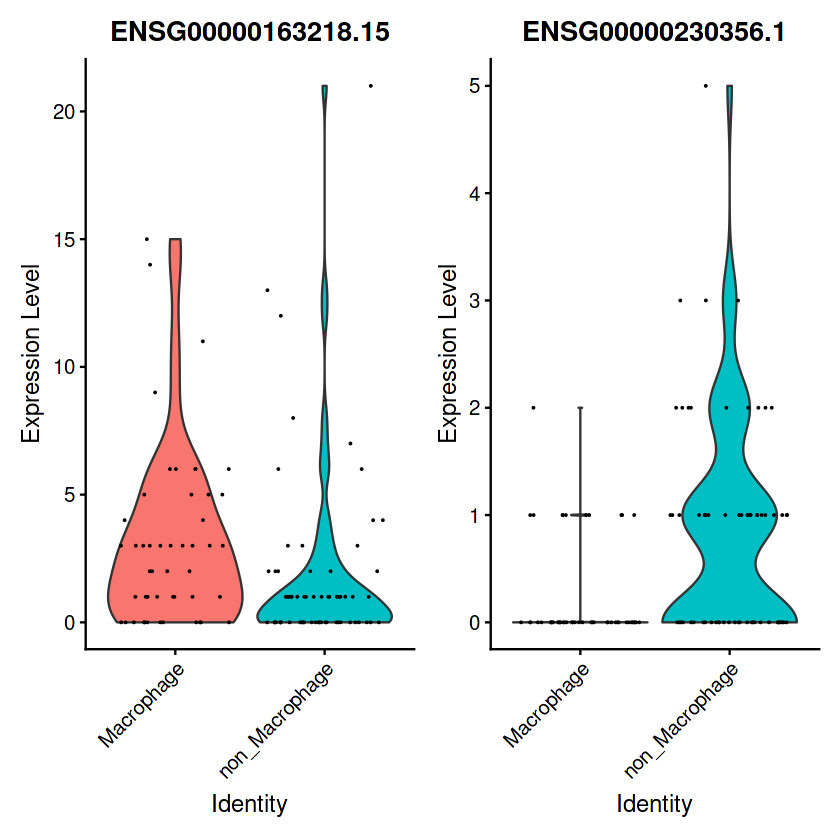

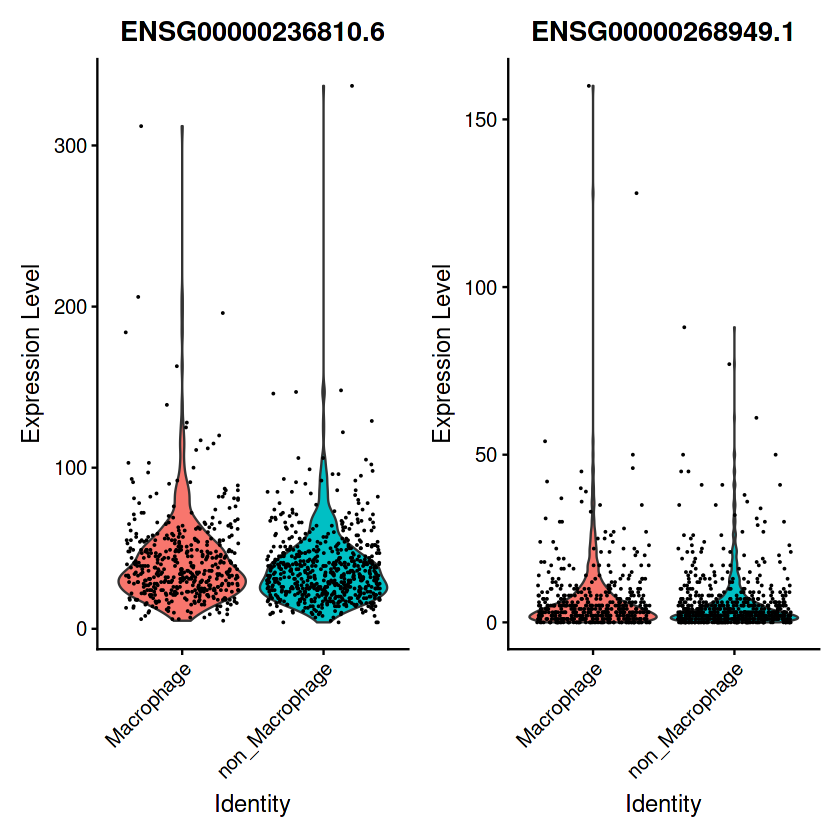

In [47]:
#查看marker基因在各group中的表达情况
#normal
VlnPlot(pbmc_normal, features = c("ENSG00000163218.15", "ENSG00000230356.1"))

#tumor
VlnPlot(pbmc_tumor, features = c("ENSG00000236810.6", "ENSG00000268949.1"))

图中可以看出不同的差异基因在mac细胞和非mac细胞中表达存在差异

In [109]:
# Load libraries
library(DESeq2)
library(reshape)
library(ggplot2)
library(ggrepel)
library(DEGreport)
library(RColorBrewer)
library(pheatmap)
library(tidyHeatmap)

### 先把差异基因提取出来，然后绘制热力图

In [51]:
rownames(pbmc.markers_normal)

[1] "ENSG00000177201.2"    "ENSG00000231426.7"    "ENSG00000230356.1"   
  [4] "ENSG00000229091.3"    "ENSG00000233377.1"    "ENSG00000236713.1"   
  [7] "ENSG00000218069.2"    "ENSG00000251350.2"    "ENSG00000267052.3"   
 [10] "ENSG00000286303.1"    "ENSG00000259341.2"    "ENSG00000287200.1"   
 [13] "ENSG00000284240.1"    "ENSG00000218020.3"    "ENSG00000108576.10"  
 [16] "ENSG00000216863.10"   "ENSG00000229339.1"    "ENSG00000236841.8"   
 [19] "ENSG00000286502.1"    "ENSG00000254965.1"    "ENSG00000224251.6"   
 [22] "ENSG00000236048.2"    "ENSG00000196242.10"   "ENSG00000226976.3"   
 [25] "ENSG00000242992.3"    "ENSG00000200816.1"    "ENSG00000213785.3"   
 [28] "ENSG00000139899.11"   "ENSG00000259866.1"    "ENSG00000249994.1"   
 [31] "ENSG00000257316.1"    "ENSG00000236404.10"   "ENSG00000234944.1"   
 [34] "ENSG00000226403.2"    "ENSG00000248925.1"    "ENSG00000259419.2"   
 [37] "ENSG00000248332.6"    "ENSG00000215734.3"    "ENSG00000274600.1"   
 [40] "ENSG00000260019.2"    "ENSG00000255867.1"    "ENSG00000259458.1"   
 [43] "ENSG00000287820.1"    "ENSG00000100427.16"   "ENSG00000256340.8"   
 [46] "ENSG00000261522.5"    "ENSG00000247363.2"    "ENSG00000250433.1"   
 [49] "ENSG00000105650.22"   "ENSG00000269378.1"    "ENSG00000163218.15"  
 [52] "ENSG00000223309.1"    "ENSG00000227432.1"    "ENSG00000188958.9"   
 [55] "ENSG00000169224.13"   "ENSG00000286519.1"    "ENSG00000132872.12"  
 [58] "ENSG00000260123.2"    "ENSG00000167332.9"    "ENSG00000225217.1"   
 [61] "ENSG00000201448.1"    "ENSG00000279314.1"    "ENSG00000180044.5"   
 [64] "ENSG00000228933.8"    "ENSG00000237813.4"    "ENSG00000242268.3"   
 [67] "ENSG00000262115.1"    "ENSG00000250620.2"    "ENSG00000173810.9"   
 [70] "ENSG00000204687.4"    "ENSG00000230148.8"    "ENSG00000249646.2"   
 [73] "ENSG00000280436.1"    "ENSG00000282408.1"    "ENSG00000267658.1"   
 [76] "ENSG00000206763.1"    "ENSG00000187546.14"   "ENSG00000229756.1"   
 [79] "ENSG00000272023.1"    "ENSG00000266441.1"    "ENSG00000260389.1"   
 [82] "ENSG00000244476.3"    "ENSG00000283405.2"    "ENSG00000225269.3"   
 [85] "ENSG00000272382.1"    "ENSG00000278884.1"    "ENSG00000227508.6"   
 [88] "ENSG00000239323.1"    "ENSG00000261465.7"    "ENSG00000280311.1"   
 [91] "ENSG00000240244.3"    "ENSG00000137561.5"    "ENSG00000262136.1"   
 [94] "ENSG00000261340.1"    "ENSG00000223652.2"    "ENSG00000166862.7"   
 [97] "ENSG00000247853.2"    "ENSG00000267570.1"    "ENSG00000250705.1"   
[100] "ENSG00000205186.4"    "ENSG00000276729.1"    "ENSG00000260102.2"   
[103] "ENSG00000275016.5"    "ENSG00000255653.1"    "ENSG00000176177.10"  
[106] "ENSG00000234933.1"    "ENSG00000221880.4"    "ENSG00000258300.2"   
[109] "ENSG00000227969.1"    "ENSG00000225169.1"    "ENSG00000257346.1"   
[112] "ENSG00000232818.2"    "ENSG00000139155.9"    "ENSG00000250651.1"   
[115] "ENSG00000170166.6"    "ENSG00000125498.20"   "ENSG00000225126.1"   
[118] "ENSG00000234235.1"    "ENSG00000211695.2"    "ENSG00000228056.3"   
[121] "ENSG00000273124.1"    "ENSG00000274742.1"    "ENSG00000249650.1"   
[124] "ENSG00000223626.1"    "ENSG00000227467.3"    "ENSG00000231970.1"   
[127] "ENSG00000187999.4"    "ENSG00000271443.1"    "ENSG00000235205.1"   
[130] "ENSG00000257512.1"    "ENSG00000243193.4"    "ENSG00000280020.1"   
[133] "ENSG00000249256.2"    "ENSG00000225922.1"    "ENSG00000213900.2"   
[136] "ENSG00000227032.1"    "ENSG00000267683.1"    "ENSG00000227308.2"   
[139] "ENSG00000275152.5"    "ENSG00000232823.2"    "ENSG00000233338.1"   
[142] "ENSG00000172554.12"   "ENSG00000230853.1"    "ENSG00000267714.2"   
[145] "ENSG00000139445.18"   "ENSG00000277831.1"    "ENSG00000236972.2"   
[148] "ENSG00000225106.1"    "ENSG00000213539.4"    "ENSG00000143768.13"  
[151] "ENSG00000269172.1"    "ENSG00000170298.15"   "ENSG00000227117.6"   
[154] "ENSG00000248540.3"    "ENSG00000202360.1"    "ENSG00000177757.2"   
[157] "ENSG00000248394.1"    "ENSG00000169618.7"    "ENSG00000095917.14"  
[160] "ENSG00000105492.16" 

In [52]:
DE_normal <- normal_count[rownames(pbmc.markers_normal),]
head(DE_normal,2)
dim(DE_normal)

,TCGA.E2.A1L7.11A.33R.A144.07,TCGA.E2.A1IG.11A.22R.A144.07,TCGA.BH.A0BS.11A.11R.A12P.07,TCGA.E9.A1NA.11A.33R.A144.07,TCGA.BH.A0H9.11A.22R.A466.07,TCGA.BH.A0BQ.11A.33R.A115.07,TCGA.BH.A0E0.11A.13R.A089.07,TCGA.BH.A1FH.11B.42R.A13Q.07,TCGA.E9.A1NG.11A.52R.A14M.07,TCGA.BH.A0DO.11A.22R.A12D.07,⋯,TCGA.AC.A2FM.11B.32R.A19W.07,TCGA.BH.A1FJ.11B.42R.A13Q.07,TCGA.E9.A1ND.11A.43R.A144.07,TCGA.BH.A1FU.11A.23R.A14D.07,TCGA.E9.A1RF.11A.32R.A157.07,TCGA.A7.A0DC.11A.41R.A089.07,TCGA.BH.A18J.11A.31R.A12D.07,TCGA.BH.A18R.11A.42R.A12D.07,TCGA.BH.A0DK.11A.13R.A089.07,TCGA.E2.A158.11A.22R.A12D.07
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000177201.2,0,0,0,0,0,0,0,1,0,0,⋯,0,1,0,0,0,0,0,0,0,0
ENSG00000231426.7,0,3,5,3,23,6,0,2,45,3,⋯,10,45,34,2,5,36,10,9,7,4


[1] 502 113

In [54]:
#删除na行
DE_normal <- na.omit(DE_normal)                           # Apply na.omit function
dim(DE_normal)                

[1] 251 113

In [70]:
tDE_normal <- t(DE_normal)
head(tDE_normal,2)
dim(tDE_normal)

,ENSG00000177201.2,ENSG00000231426.7,ENSG00000230356.1,ENSG00000229091.3,ENSG00000233377.1,ENSG00000236713.1,ENSG00000218069.2,ENSG00000251350.2,ENSG00000267052.3,ENSG00000286303.1,⋯,ENSG00000232387.2,ENSG00000169994.18,ENSG00000252742.1,ENSG00000287791.1,ENSG00000287797.1,ENSG00000236608.1,ENSG00000225706.2,ENSG00000287590.1,ENSG00000176635.18,ENSG00000151834.16
TCGA.E2.A1L7.11A.33R.A144.07,0,0,0,0,0,1,0,0,1,1,⋯,0,80,2,0,2,0,5,0,1,31
TCGA.E2.A1IG.11A.22R.A144.07,0,3,0,1,1,0,0,0,5,2,⋯,1,230,0,0,9,0,15,7,3,108


[1] 113 251

In [69]:
head(t(group_normal))
dim(t(group_normal))

,36810
TCGA.E2.A1L7.11A.33R.A144.07,Macrophage
TCGA.E9.A1NA.11A.33R.A144.07,Macrophage
TCGA.BH.A0H9.11A.22R.A466.07,Macrophage
TCGA.BH.A1FH.11B.42R.A13Q.07,Macrophage
TCGA.E9.A1NG.11A.52R.A14M.07,Macrophage
TCGA.E2.A1BC.11A.32R.A12P.07,Macrophage


[1] 113   1

In [79]:
library(scater)

In [90]:
label <- as.data.frame(t(group_normal))
normal_label <- cbind(tDE_normal,label)
head(normal_label,2)
dim(normal_label)

,ENSG00000177201.2,ENSG00000231426.7,ENSG00000230356.1,ENSG00000229091.3,ENSG00000233377.1,ENSG00000236713.1,ENSG00000218069.2,ENSG00000251350.2,ENSG00000267052.3,ENSG00000286303.1,⋯,ENSG00000169994.18,ENSG00000252742.1,ENSG00000287791.1,ENSG00000287797.1,ENSG00000236608.1,ENSG00000225706.2,ENSG00000287590.1,ENSG00000176635.18,ENSG00000151834.16,36810
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
TCGA.E2.A1L7.11A.33R.A144.07,0,0,0,0,0,1,0,0,1,1,⋯,80,2,0,2,0,5,0,1,31,Macrophage
TCGA.E2.A1IG.11A.22R.A144.07,0,3,0,1,1,0,0,0,5,2,⋯,230,0,0,9,0,15,7,3,108,Macrophage


[1] 113 252

In [138]:
DE_normal <- read.csv('/home/shiyu/data/BRCA/DE/marker_genes_normal.csv',row.names=1)
DE_tumor <- read.csv('/home/shiyu/data/BRCA/DE/marker_genes_tumor.csv',row.names=1)

head(DE_normal,2)
dim(DE_normal)
dim(DE_tumor)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
ENSG00000177201.2,0.0001981175,1.116725,0.388,0.094,1,Macrophage,ENSG00000177201.2
ENSG00000231426.7,0.0002650756,-41.904760,0.776,0.906,1,Macrophage,ENSG00000231426.7


[1] 502   7

[1] 388   7

normal mac=251
non_mac=251

tumor mac=194
non+mac=194

In [139]:
DE_normal$group <- rep('normal',nrow(DE_normal))
DE_tumor$group <- rep('tumor',nrow(DE_tumor))

In [170]:
head(DE_normal,2)
dim(DE_normal)
dim(DE_tumor)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,group
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
ENSG00000177201.2,0.0001981175,1.116725,0.388,0.094,1,Macrophage,ENSG00000177201.2,normal
ENSG00000231426.7,0.0002650756,-41.904760,0.776,0.906,1,Macrophage,ENSG00000231426.7,normal


[1] 502   8

[1] 388   8

In [175]:
loc_normal <- which(abs(DE_normal$avg_log2FC) > 1)
loc_tumor <- which(abs(DE_tumor$avg_log2FC) > 1)

In [180]:
DE_normal <- DE_normal[loc_normal,]
DE_tumor <- DE_tumor[loc_tumor,]

DE_normal <- DE_normal[,1:5]
DE_tumor <- DE_tumor[,1:5]

dim(DE_normal)
dim(DE_tumor)

[1] 450   5

[1] 376   5

In [160]:
com <- rbind(DE_normal,DE_tumor)
head(com,2)
dim(com)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000177201.2,0.0001981175,1.116725,0.388,0.094,1,Macrophage,ENSG00000177201.2,normal
ENSG00000231426.7,0.0002650756,-41.904760,0.776,0.906,1,Macrophage,ENSG00000231426.7,normal


[1] 890   8

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 64 rows containing non-finite values (stat_boxplot).”


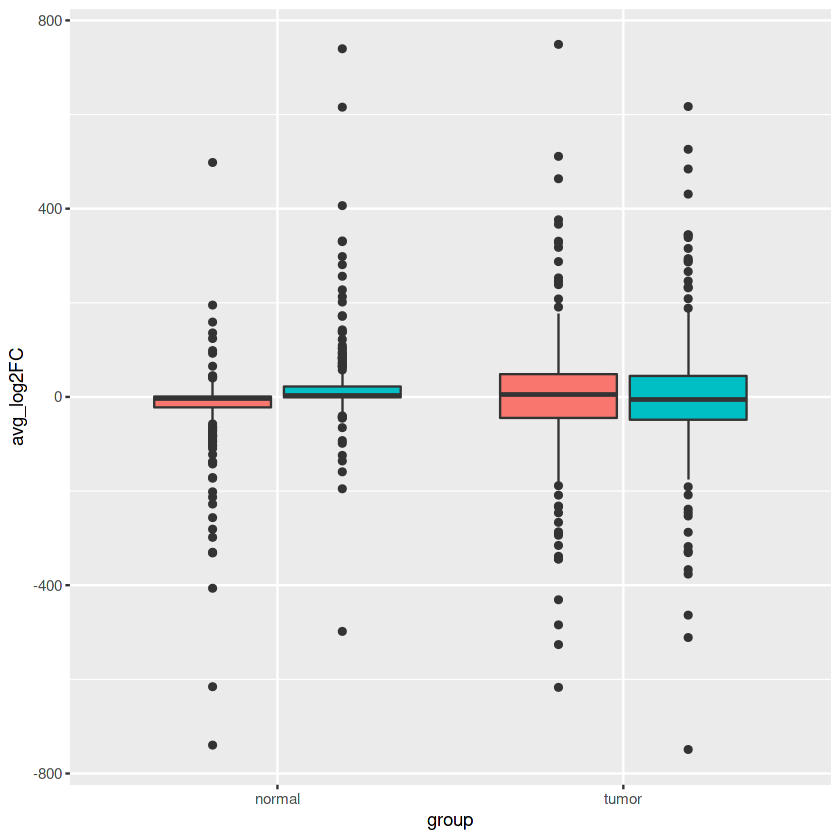

In [152]:
# 可视化avg_log2FC
# The above adds a redundant legend. With the legend removed:
ggplot(com, aes(x=group, y=avg_log2FC, fill=cluster)) + geom_boxplot() +
    guides(fill=FALSE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


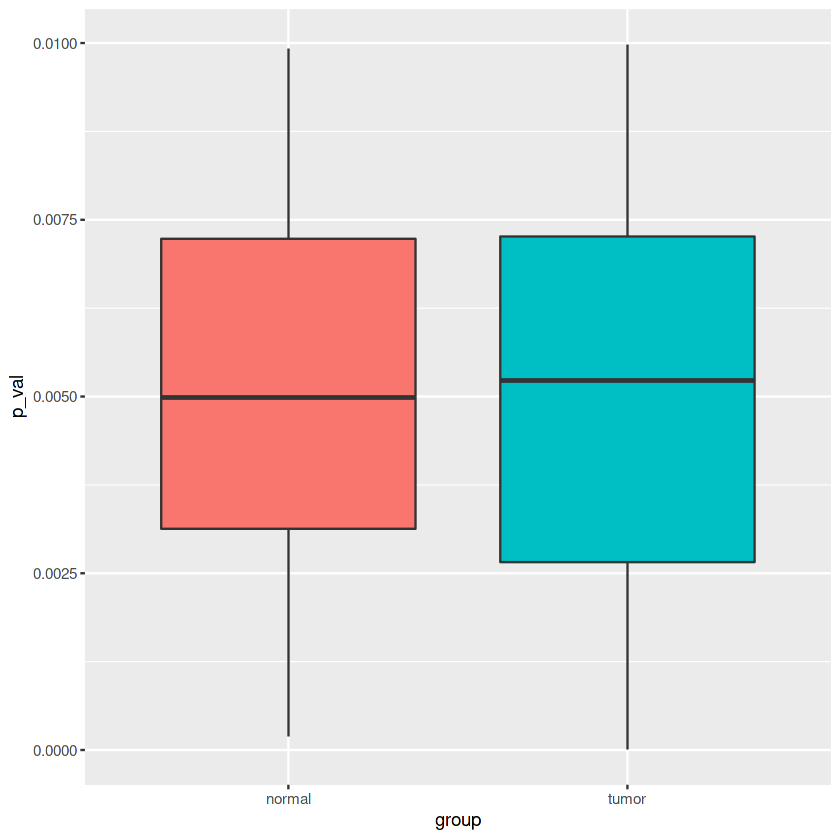

In [148]:
#可视化P值
# The above adds a redundant legend. With the legend removed:
ggplot(com, aes(x=group, y=p_val, fill=group)) + geom_boxplot() +
    guides(fill=FALSE)